## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
# df.sample(5)

In [4]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


In [5]:
df.shape

(378661, 14)

In [6]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [7]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
print('ANSW =', 3797+4)

ANSW = 3801


In [9]:
df = df.dropna()
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00


In [10]:
378661 - 374860

3801

----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [11]:
df = df.replace({'state' : { 'successful' : 1, 'failed' : 0, 'canceled' : 0 }})
df = df[~df['state'].isin(['undefined', 'live', 'suspended'])]
df.state = df.state.astype(int)

In [12]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,US,8233.00,8233.00,125000.00


In [13]:
df.shape

(370219, 14)

In [14]:
374860 - 370219

4641

In [15]:
df[df.state == 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00
100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,12700.00,12700.00,12500.00
1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,57763.78,121857.33,6469.73
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,66.72,1452.47,1165.70
999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,6169.00,6169.00,3500.00
999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1732.02,1732.02,950.00


ANSW: 133851

------

### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [16]:
# np.max(df.usd_pledged_real[df.backers == 0])

In [17]:
# df.backers = df.backers.replace(0,1)

In [18]:
df.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [19]:
df.shape

(370219, 14)

In [20]:
# np.max(df.usd_pledged_real[df.backers == 1])

In [21]:
a_1_3 = df.usd_pledged_real / df.backers
a_1_3 = a_1_3.replace(np.inf, np.NaN)

In [22]:
a_1_3

ID
1000002330           NaN
1000003930    161.400000
1000004038     73.333333
1000007540      1.000000
1000011046     91.642857
                 ...    
999976400      25.000000
999977640      31.000000
999986353      20.000000
999987933      33.333333
999988282      30.823529
Length: 370219, dtype: float64

In [23]:
a_1_3.shape

(370219,)

In [24]:
df['av_check'] = a_1_3

In [25]:
df['av_check'].shape

(370219,)

In [26]:
df['av_check'].sort_values(ascending=False)

ID
1459482568    10000.0
2024799289    10000.0
1767293256    10000.0
642968820     10000.0
472233286     10000.0
               ...   
99984851          NaN
99991751          NaN
999931480         NaN
99996661          NaN
999976312         NaN
Name: av_check, Length: 370219, dtype: float64

In [27]:
df.name[df['av_check'] == df['av_check'].max()].values[:]

array(['Patented (9 seasons) food enhancer', 'KIRISUTOS PACHYDERM',
       '21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHANGES THE WORLD',
       'The Commoner Princess',
       '"SUNBURN" - starring Michael Madsen, indie action film',
       'Hollow Earth Project, Journey to the center of the Earth,',
       'Nobody: The Movie (Canceled)',
       'Post Traumatic Stress (PTSD) Affects Us All',
       'The Hare On The Chair - An Easter Legend'], dtype=object)

-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [28]:
df.groupby('main_category')['state'].sum().sort_values(ascending=False)

main_category
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: state, dtype: int32

ANSW: Music

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [29]:
a_1_5 = df.groupby('category')['goal'].max().sort_values(ascending=False)

In [30]:
a_1_5.value_counts()

100000000.0    26
1000000.0      12
10000000.0      8
5000000.0       7
500000.0        5
               ..
860000.0        1
11000000.0      1
2119000.0       1
65000.0         1
480000.0        1
Name: goal, Length: 70, dtype: int64

ANSW: 26

-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [31]:
df.groupby('category')['usd_pledged_real'].max().sort_values(ascending=False)

category
Product Design     20338986.27
Tabletop Games     12393139.69
Gaming Hardware     8596474.58
Video Games         6333295.77
Sound               6225354.98
                      ...     
Printing              25150.30
Embroidery            18026.73
Taxidermy             15748.62
Residencies           15567.50
Crochet                7447.00
Name: usd_pledged_real, Length: 159, dtype: float64

ANSW: Product Design

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [32]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                 int32
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
av_check            float64
dtype: object

In [33]:
df.state

ID
1000002330    0
1000003930    0
1000004038    0
1000007540    0
1000011046    0
             ..
999976400     0
999977640     0
999986353     0
999987933     0
999988282     0
Name: state, Length: 370219, dtype: int32

In [34]:
num_features = ['goal', 'pledged', 'state', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'av_check']
obj_features = ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'country']

ANSW: 7

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [35]:
df['pledge2goal'] = df['usd_pledged_real']/df['goal']

In [36]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,av_check,pledge2goal
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,NaN,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,161.400000,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,73.333333,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,1.000000,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,91.642857,0.065795


In [37]:
df.shape

(370219, 16)

In [38]:
q_low = df['pledge2goal'].quantile(0.25)
q_hi  = df['pledge2goal'].quantile(0.75)

q_low, q_hi

(0.004571714285714286, 1.0725714285714285)

In [39]:
df_filtered = df[(df['pledge2goal'] > q_low) & (df['pledge2goal'] < q_hi)]
df_filtered.shape

(185108, 16)

In [40]:
print('ANSW:', df.shape[0] - df_filtered.shape[0])

ANSW: 185111


### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

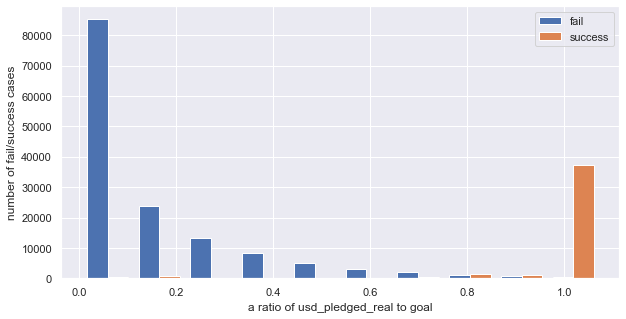

In [41]:
fail = df_filtered['pledge2goal'][df_filtered.state == 0]
success = df_filtered['pledge2goal'][df_filtered.state == 1]

plt.figure(figsize=(10,5))
plt.hist([fail, success], bins = 10, label = ['fail', 'success'])
plt.legend()
plt.ylabel('number of fail/success cases')
plt.xlabel('a ratio of usd_pledged_real to goal')
plt.show()

ANSW: B

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

([array([85218., 23754., 13374.,  8376.,  5147.,  3190.,  1921.,  1155.,
           590.,   347.]),
  array([  368.,   819.,   172.,    76.,    50.,    41.,   292.,  1554.,
          1231., 37433.])],
 array([0.004572 , 0.1113698, 0.2181676, 0.3249654, 0.4317632, 0.538561 ,
        0.6453588, 0.7521566, 0.8589544, 0.9657522, 1.07255  ]),
 <a list of 2 Lists of Patches objects>)

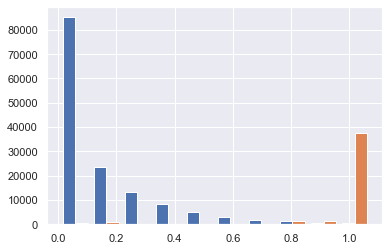

In [42]:
counts = plt.hist([fail, success], bins = 10, label = ['fail', 'success'])
counts

ANSW: [53510, 21001]

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

In [43]:
scipy.stats.pearsonr(df_filtered.pledge2goal, df_filtered.state)

(0.891993943318505, 0.0)

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

In [44]:
df[[*num_features]]

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,av_check
ID,,,,,,,,
1000002330,1000.0,0.0,0,0,0.0,0.0,1533.95,NaN
1000003930,30000.0,2421.0,0,15,100.0,2421.0,30000.00,161.400000
1000004038,45000.0,220.0,0,3,220.0,220.0,45000.00,73.333333
1000007540,5000.0,1.0,0,1,1.0,1.0,5000.00,1.000000
1000011046,19500.0,1283.0,0,14,1283.0,1283.0,19500.00,91.642857
...,...,...,...,...,...,...,...,...
999976400,50000.0,25.0,0,1,25.0,25.0,50000.00,25.000000
999977640,1500.0,155.0,0,5,155.0,155.0,1500.00,31.000000
999986353,15000.0,20.0,0,1,20.0,20.0,15000.00,20.000000


In [45]:
# df.plot.scatter(df.goal, df.state)

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [46]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)
df = df.dropna()
df = df.replace({'state' : { 'successful' : 1, 'failed' : 0, 'canceled' : 0 }})
df = df[~df['state'].isin(['undefined', 'live', 'suspended'])]

In [47]:
date_launched = pd.to_datetime(df['launched'])
df['year'] = date_launched.dt.year
df[df['year'] == 2012]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
ID,,,,,,,,,,,,,,,
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.0,2012
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,250.00,250.00,250.0,2012
1000071625,Boco Tea,Food,Food,USD,2012-06-02,5000.0,2012-05-03 17:24:32,1781.00,0,40,US,1781.00,1781.00,5000.0,2012
1000131947,Arrows & Sound Debut Album,Indie Rock,Music,USD,2012-05-19,4000.0,2012-04-19 01:04:31,8641.34,1,157,US,8641.34,8641.34,4000.0,2012
1000146991,Help Scott Reynolds Make a New Record!,Indie Rock,Music,USD,2012-09-02,15000.0,2012-08-03 18:43:16,17499.99,1,277,US,17499.99,17499.99,15000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999762532,Traverse City Dance Project 2012,Dance,Dance,USD,2012-05-18,7000.0,2012-04-08 22:49:06,7120.00,1,75,US,7120.00,7120.00,7000.0,2012
999778598,"Michael & Jeanne ""Peace and Sunshine""",Indie Rock,Music,USD,2012-07-10,12500.0,2012-06-10 19:35:15,15.00,0,1,US,15.00,15.00,12500.0,2012
999799441,The Hollywood Kills On Tour,Rock,Music,USD,2012-05-04,10000.0,2012-03-05 23:12:03,10300.00,1,78,US,10300.00,10300.00,10000.0,2012


ANSW: 41109

### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [48]:
date_deadline = pd.to_datetime(df['deadline'])
duration = date_deadline - date_launched

In [49]:
df['duration_days'] = duration.dt.days
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55


In [50]:
print('ANSW', df['duration_days'].median())

ANSW 29.0


### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [51]:
df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [52]:
myDict = {}
myDict['Europe'] = ['GB', 'NO', 'IT', 'DE', 'IE', 'ES', 'SE', 'FR', 'NL', 'CH', 'AT','BE', 'DK', 'LU']
myDict['North_America'] = ['US', 'CA'] 
myDict['Asia_Pacific'] = ['AU', 'NZ', 'HK', 'SG', 'JP']     
myDict['South_Latin_America'] = ['MX']
myDict

{'Europe': ['GB',
  'NO',
  'IT',
  'DE',
  'IE',
  'ES',
  'SE',
  'FR',
  'NL',
  'CH',
  'AT',
  'BE',
  'DK',
  'LU'],
 'North_America': ['US', 'CA'],
 'Asia_Pacific': ['AU', 'NZ', 'HK', 'SG', 'JP'],
 'South_Latin_America': ['MX']}

In [53]:
inv_dict = {}
for k,v in myDict.items():
    for x in v:
        inv_dict.setdefault(x,[]).append(k)

In [54]:
inv_dict

{'GB': ['Europe'],
 'NO': ['Europe'],
 'IT': ['Europe'],
 'DE': ['Europe'],
 'IE': ['Europe'],
 'ES': ['Europe'],
 'SE': ['Europe'],
 'FR': ['Europe'],
 'NL': ['Europe'],
 'CH': ['Europe'],
 'AT': ['Europe'],
 'BE': ['Europe'],
 'DK': ['Europe'],
 'LU': ['Europe'],
 'US': ['North_America'],
 'CA': ['North_America'],
 'AU': ['Asia_Pacific'],
 'NZ': ['Asia_Pacific'],
 'HK': ['Asia_Pacific'],
 'SG': ['Asia_Pacific'],
 'JP': ['Asia_Pacific'],
 'MX': ['South_Latin_America']}

In [55]:
df['region'] = df['country'].map(inv_dict)

In [57]:
def foo (a):
    return a[0]

In [58]:
df['region'] = df['region'].apply(foo)

In [59]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58,Europe
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59,North_America
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44,North_America
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29,North_America
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55,North_America


### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [60]:
main_category = df['main_category'].unique()
main_category

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [61]:
a_2_5 = df['category'][df['main_category'] == main_category[4]].value_counts()
a_2_5[0:3]

Product Design    21886
Design             4122
Graphic Design     1990
Name: category, dtype: int64

ANSW: Product Design

In [62]:
save = a_2_5[3:]
list_others = save.index.to_list()
list_others

['Architecture', 'Interactive Design', 'Civic Design', 'Typography']

In [63]:
df_test = df.replace({'category' : { list_others[0]: 'other' }})
df_test[df_test['category'] == 'other'].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1000581804,Architecture & Design Website,other,Design,GBP,2014-09-28,500.0,2014-08-29 19:47:50,0.0,0,0,GB,0.0,0.0,803.32,2014,29,Europe
1003357844,"""It's bigger on the inside""",other,Design,USD,2015-10-19,35000.0,2015-09-19 05:27:42,249.0,0,9,US,249.0,249.0,35000.00,2015,29,North_America
1004094650,Imagine You Could Build Anything,other,Design,USD,2016-09-29,30000.0,2016-08-30 21:16:00,0.0,0,0,US,0.0,0.0,30000.00,2016,29,North_America
1007573974,PlayThink,other,Design,USD,2015-02-28,12500.0,2015-01-29 05:50:05,29.0,0,4,US,29.0,29.0,12500.00,2015,29,North_America
1007995439,Cozy Log Cabin's Treeverb Studio~Sweet Sweat L...,other,Design,USD,2015-09-30,1234.0,2015-09-04 02:57:07,530.0,0,2,US,530.0,530.0,1234.00,2015,25,North_America


In [64]:
for i in range(0, len(main_category)):
    a_2_5 = df['category'][df['main_category'] == main_category[i]].value_counts()
    save = a_2_5[3:]
    list_others = save.index.to_list()
    for j in range(0, len(list_others)):
        df = df.replace({'category' : { list_others[j]: 'other' }})

In [65]:
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58,Europe
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59,North_America
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44,North_America
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29,North_America
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55,North_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,2014,29,North_America
999977640,The Tribe,other,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,2011,26,North_America
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,other,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,2010,45,North_America


### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [66]:
df['name_length'] = df['name'].str.len()

In [67]:
print('ANSW:',df['name_length'].max())

ANSW: 96


In [68]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,GB,0.00,0.00,1533.95,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.00,2421.00,30000.00,2017,59,North_America,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,US,220.00,220.00,45000.00,2013,44,North_America,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.00,2012,29,North_America,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,US,1283.00,1283.00,19500.00,2015,55,North_America,58
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00,2016,34,North_America,20
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00,2014,19,North_America,60
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,US,453.00,453.00,25000.00,2016,44,North_America,49
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,US,8233.00,8233.00,125000.00,2014,34,North_America,53


# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


ANSW: the colomn with pledged money, because we don't know this info when we are predicting if the project will be successfull, i.e. would it achieve the funding goal or not.

In [69]:
df.drop('pledged', axis=1, inplace=True)
df.drop('usd pledged', axis=1, inplace=True)
df.drop('usd_pledged_real', axis=1, inplace=True)

In [70]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_goal_real,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,0,GB,1533.95,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,15,US,30000.00,2017,59,North_America,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,3,US,45000.00,2013,44,North_America,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,1,US,5000.00,2012,29,North_America,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,14,US,19500.00,2015,55,North_America,58


### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [71]:
df.drop('name', axis=1, inplace=True)
df.drop('deadline', axis=1, inplace=True)
df.drop('launched', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('usd_goal_real', axis=1, inplace=True)

In [72]:
df.head()

,category,main_category,currency,goal,state,backers,year,duration_days,region,name_length
ID,,,,,,,,,,
1000002330,other,Publishing,GBP,1000.0,0,0,2015,58,Europe,31
1000003930,other,Film & Video,USD,30000.0,0,15,2017,59,North_America,45
1000004038,other,Film & Video,USD,45000.0,0,3,2013,44,North_America,14
1000007540,Music,Music,USD,5000.0,0,1,2012,29,North_America,49
1000011046,Film & Video,Film & Video,USD,19500.0,0,14,2015,55,North_America,58


In [73]:
num_features = ['goal', 'state', 'backers', 'year', 'duration_days', 'name_length']
obj_features = ['category', 'main_category', 'currency', 'region']

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[['category', 'main_category', 'currency', 'region']]))

### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

------

------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

### Q4.2 What is an optimal C for l2 regularization?

### Q4.3 What is the accuracy for this params?

### Q4.4 What is the two most important features by logistic regression estimation?

### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?


------

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

### Q4.6 What is an optimal depth and number of trees?

### Q4.7 What is the accuracy for this params?

### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

### Q4.9 What is the two most important features by random forest?

------

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

### Q5.2 Train an xgboost, that's beat random forest